In [1]:
import numpy as np
import os
import math
import matplotlib.pyplot
import glob
from PIL import Image, ImageFilter
import scipy.ndimage
%matplotlib inline

In [2]:
# read emnist dataset from https://www.kaggle.com/crawford/emnist
training_data_file = open("mnist_dataset/emnist-letters-train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

test_data_file = open("mnist_dataset/emnist-letters-test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [3]:
# neural network class based on makeyourownneuralnetwork book
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        """
        initializer of neuralNetwork 
        inputnodes: number of nodes in input layer
        hiddennodes: number of nodes in hidden layer
        outputnodes: number of nodes in output layer
        learningrate: learning rate of neural network
        """
        self.nodes_in, self.nodes_hidden, self.nodes_out, self.rate_learning = inputnodes, hiddennodes, outputnodes, learningrate
        self.weights_hiddenout = np.random.normal(0, (self.nodes_hidden)**(-1/2), (self.nodes_out, self.nodes_hidden))
        self.weights_inhidden = np.random.normal(0, (self.nodes_in)**(-1/2), (self.nodes_hidden, self.nodes_in))
    
    def activation_function(self, x):
        def sigmoid(m):
            # numpy implementation of sigmoid function
            return 1.0/(1.0+np.exp(-m))
        return sigmoid(x)
        
    def train(self, inputs, targets):
        """
        train the neuralNetwork
        inputs: image value list
        targets: list of target values
        """
        i = np.array(inputs, ndmin=2).T
        t = np.array(targets, ndmin=2).T
        
        o_hidden = self.activation_function(np.dot(self.weights_inhidden, i))
        o_out = self.activation_function(np.dot(self.weights_hiddenout, o_hidden))
        err_out = t - o_out
        err_hidden = np.dot(self.weights_hiddenout.T, err_out)
        temp1, temp2 = o_out * (1.0-o_out) * err_out, o_hidden * (1.0-o_hidden) * err_hidden
        self.weights_inhidden += np.dot(temp2, np.transpose(i)) * (self.rate_learning)
        self.weights_hiddenout += np.dot(temp1, np.transpose(o_hidden)) * (self.rate_learning)
        
    def query(self, inputs):
        """
        query the neuralNetwork
        li: list of input values if uploadedImage is False else image value list
        uploadedImage: True if querying uploaded image
        """
        i = np.array(inputs, ndmin=2).T
        o_hidden = self.activation_function(np.dot(self.weights_inhidden, i))
        o_out = self.activation_function(np.dot(self.weights_hiddenout, o_hidden))
        return o_out
    
    # save neural network weights
    def save(self):
        np.save('letter_wih.npy', self.weights_inhidden)
        np.save('letter_who.npy', self.weights_hiddenout)

    # load neural network weights
    def load(self):
        self.weights_inhidden = np.load('letter_wih.npy')
        self.weights_hiddenout = np.load('letter_who.npy')


In [4]:
def getInputs(arr):
    # function returns list of input values from image value list
    return 0.01 + (np.asfarray(arr[1:])/256.0)

In [5]:
# initialize the neural network object 
input_nodes, hidden_nodes, output_nodes, learning_rate = 784, 200, 27, 0.1

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [12]:
# train the neural network 
#epochs = 5
#
#for _ in range(epochs):
#    for image in training_data_list:
#        vals = image.split(',')
#        inputs = getInputs(vals)
#        targets = np.zeros(output_nodes) + 0.01
#        targets[int(vals[0])] = 0.99
#        nn.train(inputs, targets)
nn.load()

In [13]:
# test the neural network
tlist = []

for image in test_data_list:
    vals = image.split(',')
    correct_val = int(vals[0])
    inputs = getInputs(vals)
    outputs = nn.query(inputs)
    output_val = np.argmax(outputs)
    tlist.append(int(output_val==correct_val))
    
# calculate accuracy performance of neural network
test_result = np.asarray(tlist)
acc_performance = test_result.sum()/test_result.size
print("Accuracy Performance: ", acc_performance)

Accuracy Performance:  0.8243918918918919


In [14]:
#nn.save()

In [15]:
def imageprepare(fpath):
    """
    returns pixel values of image in fpath
    fpath: path to png image location
    """
    im = Image.open(fpath).convert('L')
    h, w = float(im.size[1]), float(im.size[0])
    newImg = Image.new('L', (28, 28), (256))
    if w <= h:
        newW = int(round((20.0/h*w), 0))
        if newW == 0:
            newW+=1
        img = im.resize((newW, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        leftW = int(round(((28-newW)/2), 0))
        newImg.paste(img, (leftW, 4))
    else:
        newH = int(round((20.0/w*h), 0))
        if newH == 0:
            newH+=1
        img = im.resize((20, newH), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        topW = int(round(((28-newH)/2), 0))
        newImg.paste(img, (4, topW))
    plist = [(256-x)*1.0 / 256.0 for x in newImg.getdata()]
    return plist

In [34]:
# testing custom image
alp = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
uploaded_img = []
for image in glob.glob('static/B.png'): 
    label = alp.index(image[-5:-4])
    x=imageprepare(image)#file path here
    record = np.append(label,x)
    uploaded_img.append(record)


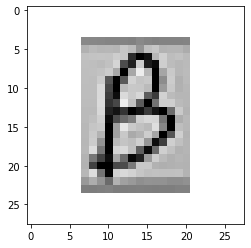

In [35]:
matplotlib.pyplot.imshow(uploaded_img[0][1:].reshape(28,28), cmap='Greys', interpolation='None')


In [36]:
item = 0
correct_label = uploaded_img[item][0]
print(correct_label)
inputs = uploaded_img[item][1:]
outputs = nn.query(inputs)
print(outputs)
label1 = np.argmax(outputs)
print("network says ", label1)
# append correct or incorrect to list
if (label1 == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

1.0
[[0.02791936]
 [0.08563499]
 [0.09648043]
 [0.01499123]
 [0.0357131 ]
 [0.1138359 ]
 [0.02489359]
 [0.10532687]
 [0.02208298]
 [0.02809529]
 [0.01073883]
 [0.13971161]
 [0.01093295]
 [0.18495685]
 [0.03650939]
 [0.05512888]
 [0.02745001]
 [0.28477931]
 [0.03800086]
 [0.04482233]
 [0.01445314]
 [0.08449571]
 [0.03547355]
 [0.17067268]
 [0.19186672]
 [0.02002767]
 [0.04218402]]
network says  17
no match!
